### IPL 2022 Data Analysis Project

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**
* date : string  
* venue : string  
* stage : string  
* team1 : string  
* team2 : string  
* toss_winner : string  
* toss_decision : string  
* first_ings_score : integer  
* second_ings_score : integer  
* match_winner : string  
* won_by : string  
* margin : integer  
* player_of_the_match : string  
* top_scorer : string  
* highscore : integer  
* best_bowling : string  
* best_bowling_fgure : string  
gure : string  


### Loading the Libraries and Dataset

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv("IPL.csv")
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59


### Basic Information

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 74 rows and 20 columns.


Now let's see how many columns have null values in total.

In [8]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, Here comes some Basic Questions**

1. Which team won the most matches?

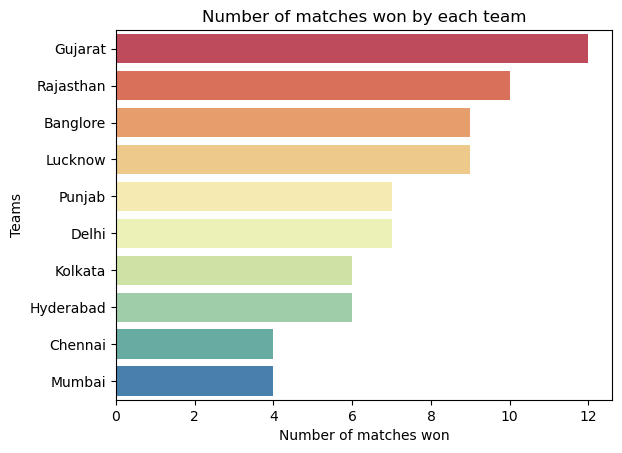

In [19]:
match_wins = df["match_winner"].value_counts()
sns.barplot(x= match_wins.values , y= match_wins.index , palette='Spectral')
plt.title("Number of matches won by each team")
plt.xlabel("Number of matches won")
plt.ylabel("Teams")
plt.show()

2. Toss Decision Trends

In [21]:
df["toss_decision"].value_counts()

toss_decision
Field    59
Bat      15
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss Decision Trends ')

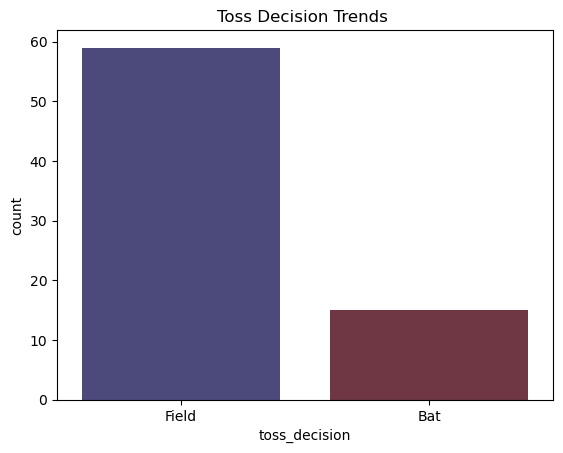

In [23]:
sns.countplot(x = df['toss_decision'],palette='icefire')
plt.title("Toss Decision Trends ")

3. Toss Winner vs Match Winner

In [25]:
df.head(2)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18


In [30]:
count = df[df["toss_winner"]== df["match_winner"]]["match_id"].count()

parcentage= count*100/ df.shape[0]
parcentage.round(2)

np.float64(48.65)

4. How do teams win? (Runs vs Wickets)

In [32]:
df["won_by"].value_counts()

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

Text(0.5, 1.0, 'Match Win Types')

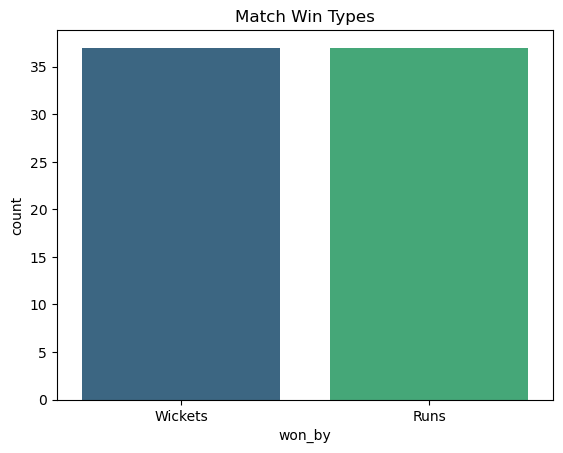

In [34]:
sns.countplot(x= df['won_by'], palette='viridis')
plt.title("Match Win Types")

###  Key Player Performances

1 Most "Player of the Match" Awards

In [40]:
count= df["player_of_the_match"].value_counts().head(10)
count

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

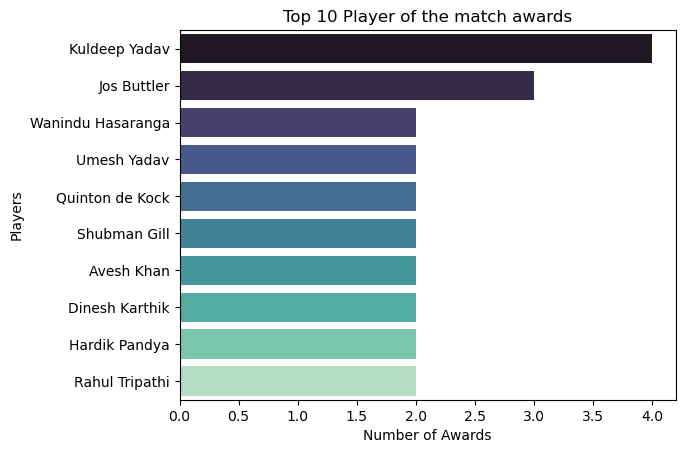

In [41]:
sns.barplot(x= count.values , y= count.index , palette='mako')
plt.title("Top 10 Player of the match awards")
plt.xlabel("Number of Awards")
plt.ylabel("Players")
plt.show()

5 Top Scorers

In [51]:
high= df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(5)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

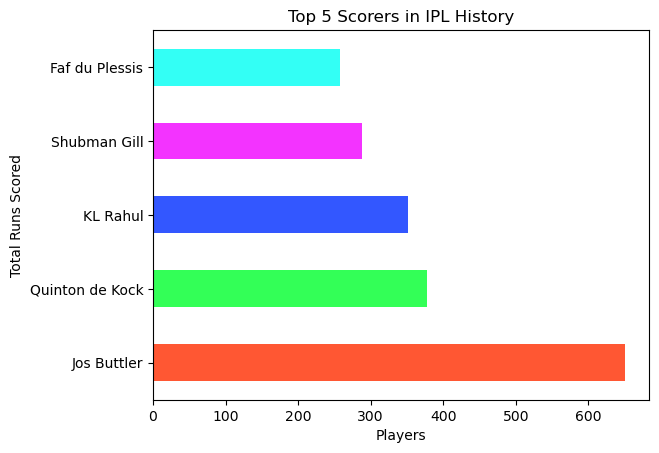

In [54]:

color= ['#FF5733', '#33FF57', '#3357FF', '#F333FF', '#33FFF5']
high.plot(kind='barh', color=color)
plt.title("Top 5 Scorers in IPL History")
plt.xlabel("Players")
plt.ylabel("Total Runs Scored")
plt.show()

10 Best Bowling Figures

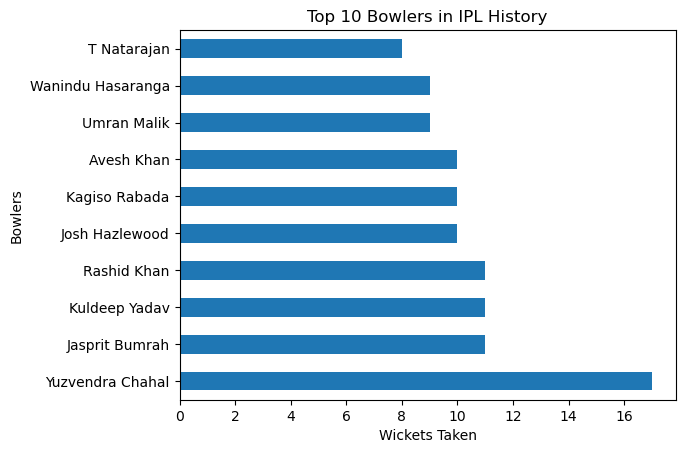

In [60]:
df["highest_wickets"] = df["best_bowling_figure"].apply(lambda x: x.split("--")[0])
df["highest_wickets"] = df["highest_wickets"].astype(int)
top_bowlers = df.groupby("best_bowling")["highest_wickets"].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind="barh")
plt.title("Top 10 Bowlers in IPL History")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowlers")
plt.show()

###  Venue Analysis

Most Matches Played by Venue

In [63]:
vanue_counts= df["venue"].value_counts().head(10)
vanue_counts

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

Text(0.5, 1.0, 'Tost Matches Played by Venue')

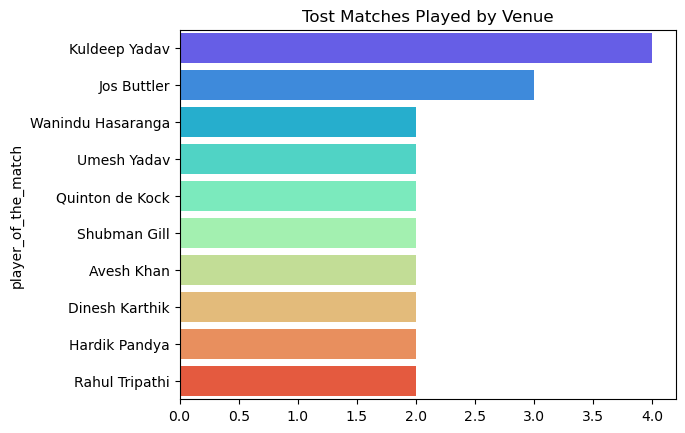

In [65]:
sns.barplot(x= count.values , y= count.index , palette='rainbow')
plt.title("Tost Matches Played by Venue")


### Custom Questions & Insights
Q1: Who won the highest margin by runs?

In [66]:
df.head(3)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wicket_taker,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2--59,2


In [71]:
df[df["won_by"]=='Runs'].sort_values(by="margin", ascending=False).head(1)[["match_winner", "margin"]]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [77]:
df[df["highscore"] == df["highscore"].max()][["top_scorer", "highscore"]]
                    

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [81]:
df[df["highest_wickets"]==df["highest_wickets"].max()][["best_bowling", "best_bowling_figure"]]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10


# Thank You